In [18]:
import pandas as pd
import numpy as np

In [19]:
import glob, os    
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('/Users/apple/Downloads/archive', "*.csv"))))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 26
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30735 non-null  float64
 1   id               34878 non-null  int64  
 2   conversation_id  34878 non-null  int64  
 3   created_at       34878 non-null  object 
 4   date             34878 non-null  object 
 5   timezone         34878 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            34878 non-null  object 
 8   language         34878 non-null  object 
 9   hashtags         34878 non-null  object 
 10  cashtags         34878 non-null  object 
 11  user_id          34878 non-null  int64  
 12  user_id_str      30735 non-null  float64
 13  username         34878 non-null  object 
 14  name             34878 non-null  object 
 15  day              30735 non-null  float64
 16  hour             30735 non-null  float64
 17  link           

In [32]:
df.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,tweet,hashtags,cashtags,user_id,user_id_str,...,link,urls,photos,video,retweet,nlikes,nreplies,nretweets,search,reply_to
0,0.0,1343644462036086785,1343320495127633920,1609184778000.0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...,[],[],44196397,44196397.0,...,https://twitter.com/elonmusk/status/1343644462...,[],[],0,False,55085.0,2922.0,2611.0,None,[]
1,1.0,1343619610617077760,1343386617294295040,1609178853000.0,2020-12-28 18:07:33,@kimpaquette Just meeting with Larry Ellison t...,[],[],44196397,44196397.0,...,https://twitter.com/elonmusk/status/1343619610...,[],[],0,False,8631.0,601.0,314.0,None,"[{'screen_name': 'kimpaquette', 'name': 'Kim P..."
2,2.0,1343608616960491521,1343576442722893825,1609176231000.0,2020-12-28 17:23:51,@richierichhhhh_ Absolutely,[],[],44196397,44196397.0,...,https://twitter.com/elonmusk/status/1343608616...,[],[],0,False,72434.0,495.0,907.0,None,"[{'screen_name': 'richierichhhhh_', 'name': 'R..."
3,3.0,1343608530998153222,1343320495127633920,1609176211000.0,2020-12-28 17:23:31,What should Tesla do with in-car gaming in an ...,[],[],44196397,44196397.0,...,https://twitter.com/elonmusk/status/1343608530...,[],[],0,False,33830.0,6932.0,884.0,None,[]
4,4.0,1343431408052662273,1343043963096326147,1609133982000.0,2020-12-28 05:39:42,@PPathole @WSJ Absolutely,[],[],44196397,44196397.0,...,https://twitter.com/elonmusk/status/1343431408...,[],[],0,False,2394.0,131.0,92.0,None,"[{'screen_name': 'PPathole', 'name': 'Pranay P..."


In [22]:
df.isnull().sum().sort_values(ascending = False)

retweet_id         34878
user_rt            34878
near               34878
geo                34878
source             34878
place              34878
trans_dest         34878
trans_src          34878
translate          34878
retweet_date       34878
user_rt_id         34878
quote_url          33837
thumbnail          32546
time               30735
mentions           30735
replies_count      30735
retweets_count     30735
likes_count        30735
nlikes              4143
search              4143
nretweets           4143
nreplies            4143
Unnamed: 0          4143
hour                4143
day                 4143
user_id_str         4143
id                     0
cashtags               0
conversation_id        0
created_at             0
date                   0
timezone               0
tweet                  0
language               0
hashtags               0
user_id                0
reply_to               0
video                  0
username               0
name                   0


In [23]:
df.drop(['timezone', 'language', 'retweet_id', 'user_rt', 'near', 'geo', 'source', 'place', 'trans_dest', 'trans_src', 'translate', 'retweet_date', 'user_rt_id', 'quote_url', 'thumbnail', 'time', 'mentions', 'replies_count', 'retweets_count', 'likes_count'], axis=1, inplace=True)

In [27]:
df['date'] = pd.to_datetime(df['date'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 26
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       30735 non-null  float64       
 1   id               34878 non-null  int64         
 2   conversation_id  34878 non-null  int64         
 3   created_at       34878 non-null  object        
 4   date             34878 non-null  datetime64[ns]
 5   tweet            34878 non-null  object        
 6   hashtags         34878 non-null  object        
 7   cashtags         34878 non-null  object        
 8   user_id          34878 non-null  int64         
 9   user_id_str      30735 non-null  float64       
 10  username         34878 non-null  object        
 11  name             34878 non-null  object        
 12  day              30735 non-null  float64       
 13  hour             30735 non-null  float64       
 14  link             34878 non-null  object  

In [30]:
print('start_date: ', df.date.min())
print('end_date: ', df.date.max())

start_date:  2010-06-04 18:31:57
end_date:  2022-03-05 00:00:00


<AxesSubplot:>

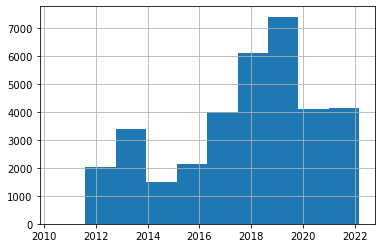

In [31]:
df.date.hist()

In [39]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

ModuleNotFoundError: No module named 'pandasql'